In [1]:
import numpy as np

$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

In [2]:
def evalf(x):
  f=0
  for i in np.arange(len(x)-1):
    f+=4*((x[i]**2 - x[i+1])**2) + (x[i]-1)**2
  return f


In [3]:
def evalg(x):
  n=len(x)
  g=np.array([16*x[0]*(x[0]**2 - x[1]) + 2*(x[0]-1)])
  for i in np.arange(1,n-1):
    g=np.append(g,(-8*(x[i-1]**2 - x[i]) + 16*(x[i]**2 - x[i+1])*x[i] + 2*(x[i]-1)))
  g=np.append(g,(-8*(x[n-2]**2 - x[n-1])))
  return np.array(g,dtype='float64').reshape((n,1))

In [4]:
def evalh(x):
  n=len(x)
  h=np.zeros((n,n))
  h[0][0]=48*(x[0]**2) - 16*x[1] + 2
  h[0][1]=-16*x[0]
  h[1][0]=h[0][1]
  for i in np.arange(1,n-1):
    h[i][i]=8 + 48*(x[i]**2)-16*x[i+1] + 2
    h[i][i+1]=-16*x[i]
    h[i+1][i]=-16*x[i]
  h[n-1][n-1]=8
  h[n-1][n-2]=h[n-2][n-1]
  return np.array(h,dtype='float64').reshape((n,n))

In [5]:
def computebk(s_k,y_k,b_k):
  i=np.identity(b_k.shape[0])
  meu_k=1/(np.matmul(y_k.T,s_k))
  return np.add(np.matmul(np.subtract(i,meu_k*np.matmul(s_k,y_k.T)),np.matmul(b_k,np.subtract(i,meu_k*np.matmul(y_k,s_k.T)))),meu_k*np.matmul(s_k,s_k.T))

In [6]:
def steplength_backtracking(x,alpha,rho,gamma,dir,grad):
  while evalf(np.subtract(x,alpha*dir))>evalf(x)-gamma*alpha*np.matmul(grad.T,dir):
    alpha=rho*alpha
  return alpha

In [7]:
def compute_minimizer(x_start,tol,algorithm,*args):
  x=x_start
  x1=x_start
  gradf=evalg(x)
  k=0
  if algorithm=='BFGS backtracking':
    b_k=args[0]
    alpha=args[1]
    rho=args[2]
    gamma=args[3]
    dir = np.matmul(b_k,gradf)
  if algorithm=='Newtons backtracking':
    alpha=args[0]
    rho=args[1]
    gamma=args[2]
    hes=evalh(x)
    dir=np.matmul(np.linalg.inv(evalh(x)),gradf)
  while np.linalg.norm(gradf)> tol:
    if algorithm=='BFGS backtracking':
      x=x1
      step_length=steplength_backtracking(x,alpha,rho,gamma,dir,gradf)
      x1=np.subtract(x,step_length*dir)
      s_k=np.subtract(x1,x)
      y_k=np.subtract(evalg(x1),evalg(x))
      gradf=evalg(x1)
      b_k=computebk(s_k,y_k,b_k)
      dir = np.matmul(b_k,gradf)
      k+=1
    if algorithm=='Newtons backtracking':
      step_length=steplength_backtracking(x,alpha,rho,gamma,dir,gradf)
      x=np.subtract(x,step_length*dir)
      gradf=evalg(x)
      dir=np.matmul(np.linalg.inv(evalh(x)),gradf)
      k+=1
    if k%10==0:
      print('minimum function value is',evalf(x),'number of iteration is',k,'gradient norm is ',np.linalg.norm(gradf))
  return x,evalf(x),k

In [8]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

Time taken to compute inverse of A: 0.005629147999997031


${\Large\text{Do not forget to rename the file before submission.}}$

[R] What is a suitable initial choice of B (denoted by B0
)? Justify with proper reasons.

In [ ]:
time_identity=[]
time_hessian=[]

In [ ]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration,"time taken",(end_time-start_time))

minimum function value is [14.17904162] number of iteration is 10 gradient norm is  34.15415098058357
minimum function value is [0.06251398] number of iteration is 20 gradient norm is  1.4958938174758638
minimum function value is [0.00176639] number of iteration is 30 gradient norm is  0.15458825522276204
minimum function value is [1.04033899e-06] number of iteration is 40 gradient norm is  0.005482367310832672
minimizer is  [[1.00000076]
 [1.00000258]
 [1.        ]
 [1.00000029]
 [0.99999982]
 [0.99999972]
 [0.99999995]
 [1.00000008]
 [1.00000022]
 [1.00000036]
 [0.99999987]
 [1.00000022]
 [0.99999944]
 [1.00000016]
 [1.0000002 ]
 [1.00000027]
 [0.99999998]
 [0.9999997 ]
 [0.99999967]
 [1.00000003]
 [1.00000038]
 [0.99999988]
 [0.99999988]
 [0.99999993]
 [0.99999991]
 [1.00000009]
 [1.00000006]
 [1.0000001 ]
 [1.00000001]
 [0.9999999 ]
 [0.99999977]
 [0.99999984]
 [1.00000009]
 [1.00000024]
 [1.00000016]
 [0.9999998 ]
 [0.99999968]
 [0.99999997]
 [1.00000031]
 [1.00000007]
 [0.9999995

In [ ]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration,"time taken",(end_time-start_time))

minimum function value is [55.03884798] number of iteration is 10 gradient norm is  61.21408372553241
minimum function value is [0.05588044] number of iteration is 20 gradient norm is  0.8867750507515844
minimum function value is [0.00286242] number of iteration is 30 gradient norm is  0.34743829466350273
minimum function value is [1.95600031e-06] number of iteration is 40 gradient norm is  0.007824408347151814
minimum function value is [1.31842755e-10] number of iteration is 50 gradient norm is  6.373686042997521e-05
minimizer is  [[1.00000082]
 [1.00000186]
 [1.00000009]
 ...
 [0.9999982 ]
 [0.9999959 ]
 [0.99999098]] minimum function value is [1.31842755e-10] number of iteration 50 time taken 142.00305935199867


In [ ]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [127.20779102] number of iteration is 10 gradient norm is  120.81261734451758
minimum function value is [0.34299972] number of iteration is 20 gradient norm is  1.975065784801985
minimum function value is [0.01260475] number of iteration is 30 gradient norm is  0.5910495567645945
minimum function value is [4.93408151e-05] number of iteration is 40 gradient norm is  0.061248561222323986
minimum function value is [1.64118543e-06] number of iteration is 50 gradient norm is  0.009853532577500308
minimum function value is [8.30449662e-10] number of iteration is 60 gradient norm is  0.00017497530261978856
minimizer is  [[1.00000012]
 [1.00000125]
 [0.99999989]
 ...
 [1.00000025]
 [1.00000139]
 [1.00000311]] minimum function value is [1.25879972e-10] number of iteration 62


In [ ]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [117.03560119] number of iteration is 10 gradient norm is  117.83462398497456
minimum function value is [0.28199288] number of iteration is 20 gradient norm is  2.9812656203341876
minimum function value is [0.00732752] number of iteration is 30 gradient norm is  0.4479047681725369
minimum function value is [0.0002568] number of iteration is 40 gradient norm is  0.10860181215538556
minimum function value is [1.1613875e-05] number of iteration is 50 gradient norm is  0.020124936378175855
minimum function value is [9.22982745e-10] number of iteration is 60 gradient norm is  0.0001788036204859825
minimizer is  [[1.00000029]
 [1.00000073]
 [1.00000114]
 ...
 [1.00000007]
 [1.00000006]
 [1.00000009]] minimum function value is [1.36534422e-10] number of iteration 62


In [ ]:
print(time_hessian)

[-17.117971049001426, -141.19880898100018, -1147.277822733, -3725.084726184001]


In [ ]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.linalg.inv(evalh(x))
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_hessian.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
pd.DataFrame({'n':[1000,2500,5000,7500],'time taken by BFGS when we consider inverse of hessian matrix as initial bk':[17.117971049001426, 141.19880898100018, 1147.277822733, 3725.084726184001],"objective function value":[[1.92747462e-10],[1.31842755e-10],[1.25879972e-10],[1.36534422e-10]]})

n  \
0  1000   
1  2500   
2  5000   
3  7500   

   time taken by BFGS when we consider inverse of hessian matrix as initial bk  \
0                                          17.117971                             
1                                         141.198809                             
2                                        1147.277823                             
3                                        3725.084726                             

  objective function value  
0         [1.92747462e-10]  
1         [1.31842755e-10]  
2         [1.25879972e-10]  
3         [1.36534422e-10]

|index|n|time taken by BFGS when we consider inverse of hessian matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|17\.117971049001426|1\.92747462e-10|
|1|2500|141\.19880898100018|1\.31842755e-10|
|2|5000|1147\.277822733|1\.25879972e-10|
|3|7500|3725\.084726184001|1\.36534422e-10|

In [ ]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(1000)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [0.73092995] number of iteration is 10 gradient norm is  4.256106520260085
minimum function value is [0.10081324] number of iteration is 20 gradient norm is  0.9888071789537369
minimum function value is [0.00899228] number of iteration is 30 gradient norm is  0.3511947299974995
minimum function value is [0.00039885] number of iteration is 40 gradient norm is  0.10548876661565575
minimum function value is [4.73716717e-06] number of iteration is 50 gradient norm is  0.014539862162502387
minimum function value is [1.81378502e-07] number of iteration is 60 gradient norm is  0.0022826608190347555
minimum function value is [1.5374965e-09] number of iteration is 70 gradient norm is  0.00027974597812107223
minimizer is  [[0.99999986]
 [0.99999989]
 [0.99999994]
 [0.9999999 ]
 [0.99999996]
 [0.99999987]
 [0.99999995]
 [0.99999986]
 [0.99999995]
 [0.99999987]
 [0.99999996]
 [0.99999986]
 [0.99999997]
 [0.99999987]
 [0.99999993]
 [0.99999993]
 [0.99999992]
 [0.99999993]


In [ ]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(2500)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [1.80569] number of iteration is 10 gradient norm is  5.426398790879862
minimum function value is [0.12769554] number of iteration is 20 gradient norm is  1.5548987216705075
minimum function value is [0.01696464] number of iteration is 30 gradient norm is  0.3655224844106035
minimum function value is [0.00184815] number of iteration is 40 gradient norm is  0.20883247539241637
minimum function value is [3.04940719e-05] number of iteration is 50 gradient norm is  0.04160962130708891
minimum function value is [4.38759853e-07] number of iteration is 60 gradient norm is  0.0033786266020479835
minimum function value is [2.27587891e-09] number of iteration is 70 gradient norm is  0.00038002327955032256
minimizer is  [[1.00000003]
 [1.00000005]
 [1.00000005]
 ...
 [1.00000075]
 [1.00000197]
 [1.00000462]] minimum function value is [1.32026704e-10] number of iteration 76


In [ ]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(5000)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [7.6568486] number of iteration is 10 gradient norm is  17.511924772493394
minimum function value is [1.88295012] number of iteration is 20 gradient norm is  4.808802673515052
minimum function value is [0.58655458] number of iteration is 30 gradient norm is  2.403492686509202
minimum function value is [0.10539332] number of iteration is 40 gradient norm is  1.201186166361366
minimum function value is [0.01189885] number of iteration is 50 gradient norm is  0.5236554091355594
minimum function value is [0.0004553] number of iteration is 60 gradient norm is  0.10542051439437841
minimum function value is [1.25005494e-05] number of iteration is 70 gradient norm is  0.021530540816971228
minimum function value is [9.37203025e-08] number of iteration is 80 gradient norm is  0.0018079707875679352
minimum function value is [2.25962889e-09] number of iteration is 90 gradient norm is  0.00035365091871622566
minimizer is  [[0.99999978]
 [0.99999978]
 [0.99999993]
 ...
 [0.

In [ ]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(7500)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [6.61466286] number of iteration is 10 gradient norm is  15.622984400020128
minimum function value is [1.81270467] number of iteration is 20 gradient norm is  4.661893492211939
minimum function value is [0.51989728] number of iteration is 30 gradient norm is  2.9527561545981964
minimum function value is [0.07375269] number of iteration is 40 gradient norm is  1.0195272064830272
minimum function value is [0.00800383] number of iteration is 50 gradient norm is  0.46395156444268143
minimum function value is [0.0003191] number of iteration is 60 gradient norm is  0.0736777749485372
minimum function value is [7.98148118e-06] number of iteration is 70 gradient norm is  0.01606951471628473
minimum function value is [8.09423087e-08] number of iteration is 80 gradient norm is  0.0017941181809117694
minimum function value is [1.69341244e-09] number of iteration is 90 gradient norm is  0.0002932922910064725
minimizer is  [[0.99999991]
 [0.99999992]
 [1.00000008]
 ...
 [0

In [ ]:
print(time_identity)

[-40.88515561799977, -225.7996389359996, -1788.7484070369992, -5870.118427297999]


In [ ]:
import pandas as pd
pd.DataFrame({'n':[1000,2500,5000,7500],'time taken by BFGS when we consider identity matrix as initial bk':[40.88515561799977, 225.7996389359996, 1788.7484070369992, 5870.118427297999],"objective function value":[[2.14280045e-10],[1.32026704e-10],[1.64461827e-10],[3.03987191e-10]]})

n  time taken by BFGS when we consider identity matrix as initial bk  \
0  1000                                          40.885156                   
1  2500                                         225.799639                   
2  5000                                        1788.748407                   
3  7500                                        5870.118427                   

  objective function value  
0         [2.14280045e-10]  
1         [1.32026704e-10]  
2         [1.64461827e-10]  
3         [3.03987191e-10]

|index|n|time taken by BFGS when we consider identity matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|40\.88515561799977|2\.14280045e-10|
|1|2500|225\.7996389359996|1\.32026704e-10|
|2|5000|1788\.7484070369992|1\.64461827e-10|
|3|7500|5870\.118427297999|3\.03987191e-10|

In [ ]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
b=np.identity(10000)
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'BFGS backtracking',b,alpha,rho,gamma)
end_time=timer()
time_identity.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

,4. Use Newton’s method to solve the problem minx∈Rn f(x) . In Newton’s method implementation, use backtracking line search with α
0 = 0.9, ρ = 0.5, γ = 0.5. Take the starting point to be x
0 = (0, 0, . . . , 0) in the
implementation of Newton’s Method.

5. [R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute
the time taken by the Newton’s method with backtracking line search. Tabulate the time taken by Newton’s
method for each n.


In [9]:
time_newton=[]

In [ ]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [578.17672422] number of iteration is 10 gradient norm is  102.37090973147643
minimum function value is [578.17672422] number of iteration is 20 gradient norm is  102.37090973147643


KeyboardInterrupt: ignored

In [ ]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [1395.38801878] number of iteration is 10 gradient norm is  108.23859448669997
minimum function value is [1395.38801878] number of iteration is 20 gradient norm is  108.23859448669997


KeyboardInterrupt: ignored

In [ ]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [2757.40684305] number of iteration is 10 gradient norm is  117.36798384483781
minimum function value is [2757.40684305] number of iteration is 20 gradient norm is  117.3679838448378


KeyboardInterrupt: ignored

In [ ]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [4119.42566733] number of iteration is 10 gradient norm is  125.83677493939038


KeyboardInterrupt: ignored

In [ ]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

$\huge{solution \ \ \ 1.1}$

we can choose $\beta_0$=identity marix then first iteration becomes gradient descent after that it converge faster than gradient descent


basically we have to choose approximated value of inverse of hessian also keeping in mind that it is positive definite and symmetric

so $\beta_0=I$ is one of the choice for $\beta_0$ also we can choose a scaler multiple $\beta_0$ as initial choice since it is positive definite and symmetric 

and best choice for $\beta_0$ is choosing inverse of hessian matrix it is also symmetric and positive definite 

idea behind BFGS is choosing a $B^k$ such that it replaced inverse of hessian matrix since it is computationally expencive (when we have to calculate for each iteration) so they come with a approximated value of inverse of hessian matrix  so for initial choice we can choose inverse of hessian that makes this algorithm faster than identity matrix since we have to find inverse only once it is not take so much time 


so i have solved using initial $\beta_0$ as identity matrix and also by taking inverse of hessian matrix

$\huge{solution \ \ 1.3}$

for tolerance 1e-4

for each n the minimizer is approximately simillar to (1,1,1,1,1,,.............1) 

objective function and time taken by algorithm is given in table below

|index|n|time taken by BFGS when we consider identity matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|40\.88515561799977|2\.14280045e-10|
|1|2500|225\.7996389359996|1\.32026704e-10|
|2|5000|1788\.7484070369992|1\.64461827e-10|
|3|7500|5870\.118427297999|3\.03987191e-10|



|index|n|time taken by BFGS when we consider inverse of hessian matrix as initial bk|objective function value|
|---|---|---|---|
|0|1000|17\.117971049001426|1\.92747462e-10|
|1|2500|141\.19880898100018|1\.31842755e-10|
|2|5000|1147\.277822733|1\.25879972e-10|
|3|7500|3725\.084726184001|1\.36534422e-10|

for n=10000 it takes too much time i have run it for 2 hour after colab gives runtime error that means it takes more than 2 hours and objective function value is approx same for all n value 

$\huge{solution \ \ 1.5}$

for each n newtons method is not converge it step length tends to 0 so in each iteration we get same objective function value and minimizer value so it is not possible to solve this function by newtons method 

i have written code putting a new rule that if relative change is less than 1e-16 return message that it doesn't converge to optimum value 

In [10]:
def compute_minimizer(x_start,tol,algorithm,*args):
  x=x_start
  x1=x_start
  gradf=evalg(x)
  k=0
  if algorithm=='BFGS backtracking':
    b_k=args[0]
    alpha=args[1]
    rho=args[2]
    gamma=args[3]
    dir = np.matmul(b_k,gradf)
  if algorithm=='Newtons backtracking':
    alpha=args[0]
    rho=args[1]
    gamma=args[2]
    hes=evalh(x)
    dir=np.matmul(np.linalg.inv(evalh(x)),gradf)
  while np.linalg.norm(gradf)> tol:
    if algorithm=='BFGS backtracking':
      x=x1
      step_length=steplength_backtracking(x,alpha,rho,gamma,dir,gradf)
      x1=np.subtract(x,step_length*dir)
      s_k=np.subtract(x1,x)
      y_k=np.subtract(evalg(x1),evalg(x))
      gradf=evalg(x1)
      b_k=computebk(s_k,y_k,b_k)
      dir = np.matmul(b_k,gradf)
      k+=1
    if algorithm=='Newtons backtracking':
      x1=x
      step_length=steplength_backtracking(x,alpha,rho,gamma,dir,gradf)
      x=np.subtract(x,step_length*dir)
      gradf=evalg(x)
      dir=np.matmul(np.linalg.inv(evalh(x)),gradf)
      k+=1
      if np.linalg.norm(np.subtract(x,x1))<1e-16:
        print('this function is not converge to its optimum solution since norm of relative change is less than 1e-16 \n','\n','norm of relative change is',np.linalg.norm(np.subtract(x,x1)))
        return x,evalf(x),k
    if k%10==0:
      print('minimum function value is',evalf(x),'number of iteration is',k,'gradient norm is ',np.linalg.norm(gradf))
  return x,evalf(x),k

In [11]:
time_newton=[]

In [13]:
x=np.array([0 for i in range(1000)]).reshape((1000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

this function is not converge to its optimum solution since norm of relative change is less than 1e-16 
 
 norm of relative change is 0.0
minimizer is  [[1.37780041]
 [1.99536219]
 [1.03893228]
 [0.67559272]
 [0.53756312]
 [0.48512685]
 [0.46520676]
 [0.45763929]
 [0.45476447]
 [0.45367235]
 [0.45325746]
 [0.45309985]
 [0.45303997]
 [0.45301723]
 [0.45300859]
 [0.4530053 ]
 [0.45300406]
 [0.45300358]
 [0.4530034 ]
 [0.45300333]
 [0.45300331]
 [0.4530033 ]
 [0.4530033 ]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.45300329]
 [0.4530

In [14]:
x=np.array([0 for i in range(2500)]).reshape((2500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

this function is not converge to its optimum solution since norm of relative change is less than 1e-16 
 
 norm of relative change is 0.0
minimizer is  [[1.37780041]
 [1.99536219]
 [1.03893228]
 ...
 [0.38560429]
 [0.27558681]
 [0.06357125]] minimum function value is [1395.38801878] number of iteration 9


In [15]:
x=np.array([0 for i in range(5000)]).reshape((5000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [2757.40684305] number of iteration is 10 gradient norm is  117.36798384483781
this function is not converge to its optimum solution since norm of relative change is less than 1e-16 
 
 norm of relative change is 0.0
minimizer is  [[1.37780041]
 [1.99536219]
 [1.03893228]
 ...
 [0.38560429]
 [0.27558681]
 [0.06357125]] minimum function value is [2757.40684305] number of iteration 20


In [12]:
x=np.array([0 for i in range(7500)]).reshape((7500,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

this function is not converge to its optimum solution since norm of relative change is less than 1e-16 
 
 norm of relative change is 0.0
minimizer is  [[1.37780041]
 [1.99536219]
 [1.03893228]
 ...
 [0.38560429]
 [0.27558681]
 [0.06357125]] minimum function value is [4119.42566733] number of iteration 9


In [13]:
x=np.array([0 for i in range(10000)]).reshape((10000,1))
tol=1e-4
alpha=0.9
rho=0.5
gamma=0.5
start_time=timer()
x,min,iteration=compute_minimizer(x,tol,'Newtons backtracking',alpha,rho,gamma)
end_time=timer()
time_newton.append(start_time-end_time)
print('minimizer is ',x,'minimum function value is',min,'number of iteration',iteration)

minimum function value is [5481.4444916] number of iteration is 10 gradient norm is  133.77049085090374
this function is not converge to its optimum solution since norm of relative change is less than 1e-16 
 
 norm of relative change is 0.0
minimizer is  [[1.37780041]
 [1.99536219]
 [1.03893228]
 ...
 [0.38560429]
 [0.27558681]
 [0.06357125]] minimum function value is [5481.4444916] number of iteration 13


$\huge{solution \ \ 1.6}$

for each value of n  newtons method is does not converge  so not possible to plot for both newton and BFGS so,i have written code of ploting only BFGS method 

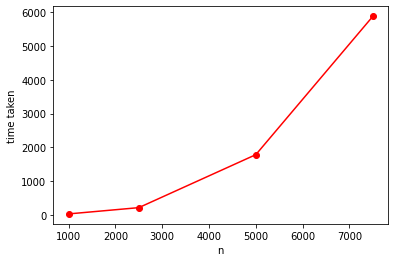

In [14]:
import matplotlib.pyplot as plt
plt.plot([1000,2500,5000,7500,],[40.88515561799977, 225.7996389359996, 1788.7484070369992, 5870.118427297999],color='r',label='time taken by BFGS when initial b=identity')
plt.scatter([1000,2500,5000,7500,],[40.88515561799977, 225.7996389359996, 1788.7484070369992, 5870.118427297999],color='r',label='time taken by BFGS when initial b=identity')
plt.xlabel('n')
plt.ylabel('time taken')
plt.show()

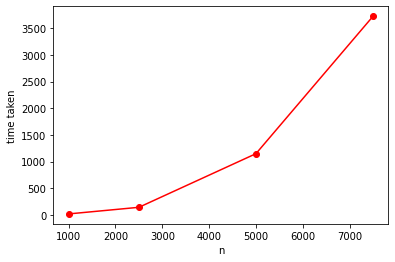

In [15]:
import matplotlib.pyplot as plt
plt.plot([1000,2500,5000,7500],[17.117971049001426, 141.19880898100018, 1147.277822733, 3725.084726184001],color='r',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.scatter([1000,2500,5000,7500],[17.117971049001426, 141.19880898100018, 1147.277822733, 3725.084726184001],color='r',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.xlabel('n')
plt.ylabel('time taken')
plt.show()

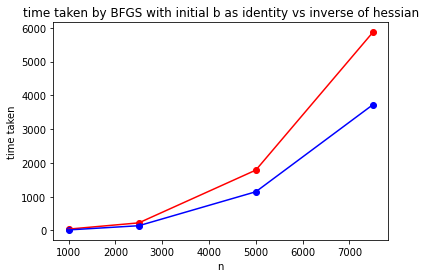

In [17]:
plt.plot([1000,2500,5000,7500,],[40.88515561799977, 225.7996389359996, 1788.7484070369992, 5870.118427297999],color='r',label='time taken by BFGS when initial b=identity')
plt.scatter([1000,2500,5000,7500,],[40.88515561799977, 225.7996389359996, 1788.7484070369992, 5870.118427297999],color='r',label='time taken by BFGS when initial b=identity')
plt.plot([1000,2500,5000,7500],[17.117971049001426, 141.19880898100018, 1147.277822733, 3725.084726184001],color='b',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.scatter([1000,2500,5000,7500],[17.117971049001426, 141.19880898100018, 1147.277822733, 3725.084726184001],color='b',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.xlabel('n')
plt.title('time taken by BFGS with initial b as identity vs inverse of hessian')
plt.ylabel('time taken')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1000,2500,5000,7500,10000],-1*time_identity,color='r',label='time taken by BFGS when initial b=identity')
plt.plot([1000,2500,5000,7500,10000],-1*time_newton,color='b',label="time taken by newtons method")
plt.xlabel('n')
plt.ylabel('time taken')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1000,2500,5000,7500,10000],-1*time_hessian,color='r',label='time taken by BFGS when inverse of hessian is considered as initial b')
plt.plot([1000,2500,5000,7500,10000],-1*time_newton,color='b',label="time taken by newtons method")
plt.xlabel('n')
plt.ylabel('time taken')
plt.show()